In [8]:
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='Subject'>

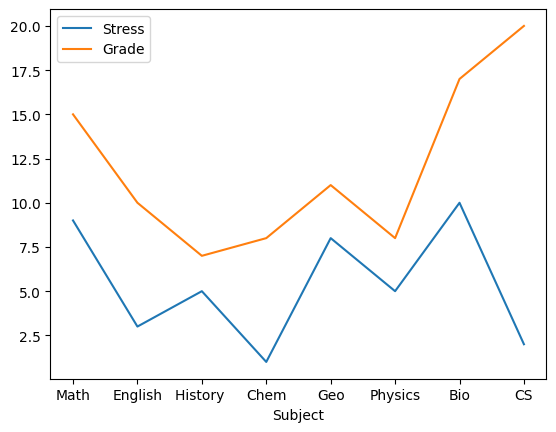

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of data
# to be represented in x-axis
subjects = [ 'Math' , 'English' , 'History ',
            'Chem' , 'Geo' , 'Physics' , 'Bio' , 'CS' ]

# Create a list of data
# to be represented in y-axis
stress = [ 9, 3 , 5 , 1 , 8 , 5 , 10 , 2 ]

# Create second list of data to be represented in y-axis
grades = [ 15, 10 , 7 , 8 , 11 , 8 , 17 , 20 ]

# Create a dataframe using the two lists
df_days_calories = pd.DataFrame(
    { 'Subject' : subjects , 
     'Stress': stress , 
     'Grade': grades})

ax = plt.gca()

#use plot() method on the dataframe
df_days_calories.plot( x = 'Subject' , y = 'Stress', ax = ax )
df_days_calories.plot( x = 'Subject' , y = 'Grade' , ax = ax )


In [10]:
import numpy as np
import pandas as pd

np.random.seed(42)

days = 365
date_range = pd.date_range(start="2024-01-01", periods=days)

# Seasonality + trend
trend = np.linspace(50, 80, days)
seasonality = 10 * np.sin(2 * np.pi * date_range.dayofyear / 7)
noise = np.random.normal(0, 5, days)

sales = trend + seasonality + noise

# Promotion effect
promo = np.random.choice([0, 1], size=days, p=[0.8, 0.2])
sales += promo * 20

df = pd.DataFrame({
    "date": date_range,
    "sales": sales.astype(int),
    "promotion": promo
})

df.tail()


,date,sales,promotion
360,2024-12-26,77,0
361,2024-12-27,77,0
362,2024-12-28,71,0
363,2024-12-29,81,0
364,2024-12-30,91,0


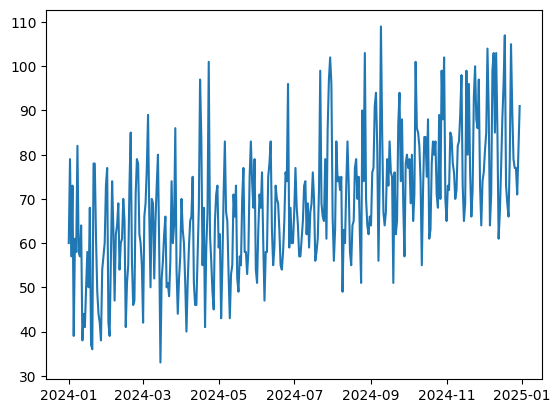

In [11]:
import matplotlib.pyplot as plt
plt.plot(df['date'],df['sales'])

In [12]:
#“What will sales look like in the future?”

from statsmodels.tsa.arima.model import ARIMA 
#ARIMA expects a univariate time series indexed by time.
ts = df.set_index("date")["sales"]
ts

date
2024-01-01    60
2024-01-02    79
2024-01-03    57
2024-01-04    73
2024-01-05    39
              ..
2024-12-26    77
2024-12-27    77
2024-12-28    71
2024-12-29    81
2024-12-30    91
Name: sales, Length: 365, dtype: int64

In [30]:
model = ARIMA(ts,order=(2,1,2))#first 2 y(t) = a1*y(t-1) + a2*y(t-2) + error, 1 differencing, 2 y(t) = b1*error(t-1) + b2*error(t-2)
mode_fit = model.fit()
forcast = mode_fit.forecast(steps=14)

c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print("p-value:", result[1])

p-value: 0.5905352546259746


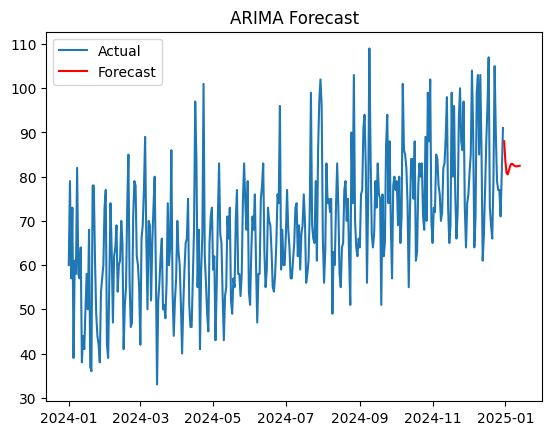

In [32]:
import matplotlib.pyplot as plt
plt.plot(ts, label="Actual")
plt.plot(forcast, label="Forecast", color="red")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


In [33]:
# Step 1: Stationarity test
print("ADF p-value (original):", adfuller(ts)[1])

# Step 2: Difference if needed
ts_diff = ts.diff().dropna()
print("ADF p-value (diff):", adfuller(ts_diff)[1])

# Step 3: Fit ARIMA
model = ARIMA(ts, order=(2,1,2))
fit = model.fit()

# Step 4: Forecast
forecast = fit.forecast(steps=14)


ADF p-value (original): 0.5905352546259746
ADF p-value (diff): 4.695091445949492e-13


c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [43]:
exog = df.set_index("date")[["promotion"]]
exog

,promotion
date,
2024-01-01,0
2024-01-02,1
2024-01-03,0
2024-01-04,1
2024-01-05,0
...,...
2024-12-26,0
2024-12-27,0
2024-12-28,0


In [45]:
future_exog = df[["promotion"]].iloc[-14:]
model_arimax = ARIMA(ts,order=(2,1,2))
fit_arimax = model_arimax.fit()
predict_arimax = fit_arimax.forecast(steps=10,exog = future_exog)


c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\sujin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


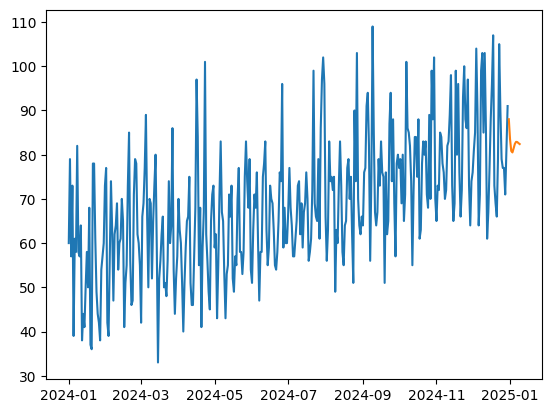

In [47]:
plt.plot(ts)
plt.plot(predict_arimax)

In [ ]:
"""IMPLEMENTATION 1: Tree-Based Demand Prediction (Random Forest)
🔹 Why Tree Models?

Capture non-linear demand

Use business features

Best real-world accuracy"""